### Задание №1: Загрузите исходный датасет по клиентам одно банка ("bank_clients_data.csv") из директории lesson_notebook_data и проведите беглый осмотр данных. Если необходимо:
1) Преобразуйте данные  
2) Обогатите данные дополнительными признаками  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
import os
import re
import warnings

#import sklearn
#import tensorflow as tf

pd.options.display.max_columns = 100
pd.options.display.max_rows =  200
pd.options.display.max_info_rows = 1690785
pd.options.display.max_info_columns = 200
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.date_dayfirst = True

# google colab use
from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#'Unnamed: 0' не повторял индекс, а значит, там была какая-то информация
#к сожалению, без описания она не дает нам никакой пользы, поэтому мы ее удаляем
df = pd.read_csv(file_path, sep=";" ).drop('Unnamed: 0', axis=1)

df['fio'] = df['fio'].str.replace('ФИО: ', '')
df['dt'] = pd.to_datetime(df['dt'])
df = df.rename({'dt' : 'date'}, axis=1)
df.head(-5)

,fio,client_id,date,accountsalary_flag,country,profit_income_out_rur_amt_6m,clientoutflowstatus,curbal_usd_amt_cm_avg,stratsegfactor,srvpackage,clientsegment,age,gender,addrref,life_time_days,profit_income_out_rur_amt_3m,profit_income_out_rur_amt_12m,profit_income_out_rur_amt_9m,turn_save_db_sum_v2,card_dda_rur_amt_3m_avg,depos_rur_amt_curr_v2,total_inc,dda_rur_amt_3m_avg,accum_rur_amt_3m_avg,dda_rur_amt_cm_avg,card_dda_rur_amt_curr_v2,sal_rur_amt_curr_v2,diff_save_cr_db_turn,depos_rur_amt_3m_avg,turn_save_db_avg_act_v2,total_rur_amt_cm_avg,depos_rur_amt_cm_avg,accum_rur_amt_cm_avg,total_rur_amt_curr_v2,diff_cur_cr_db_turn,curr_rur_amt_curr_v2,total_rur_amt_3m_avg,accum_rur_amt_curr_v2,curr_rur_amt_3m_avg,turn_fdep_cr_avg_act_v2,cred_dda_rur_amt_curr_v2,tda_rur_amt_3m_avg,curr_rur_amt_cm_avg,days_to_last_transaction,by_category__amount__SUM__eoperation_type_name__perevod_po_nomeru_telefona,by_category__amount__SUM__eoperation_type_name__vneshnij_perevod_rur,avg_amount_daily_transactions_30d,avg_amount_daily_transactions_90d,avg_cnt_daily_transactions_30d,avg_cnt_daily_transactions_90d,...,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__tsvety,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__vse_dlja_doma,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__vydacha_nalichnyh_v_bankomate,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__zarubezhnye_finansovye_operatsii,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__zdorove,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__zoomagaziny,hdb_bki_active_auto_cnt,hdb_bki_active_cc_cnt,hdb_bki_active_cc_max_limit,hdb_bki_active_cc_max_outstand,hdb_bki_active_ip_cnt,hdb_bki_active_ip_max_limit,hdb_bki_active_ip_max_outstand,hdb_bki_active_max_limit,hdb_bki_active_oth_cnt,hdb_bki_active_pil_cnt,hdb_bki_active_pil_max_limit,hdb_bki_active_pil_max_outstand,hdb_bki_last_product_days,hdb_bki_other_active_cc_month_payments_sum,hdb_bki_other_active_cc_outstanding,hdb_bki_other_active_ip_month_payments_sum,hdb_bki_other_active_ip_outstanding,hdb_bki_other_active_pil_month_payments_sum,hdb_bki_other_active_pil_outstanding,hdb_bki_total_active_products,hdb_bki_total_auto_cnt,hdb_bki_total_auto_last_days,hdb_bki_total_auto_max_limit,hdb_bki_total_cc_cnt,hdb_bki_total_cc_last_days,hdb_bki_total_cc_max_limit,hdb_bki_total_cnt,hdb_bki_total_currency,hdb_bki_total_ip_cnt,hdb_bki_total_ip_last_days,hdb_bki_total_ip_max_limit,hdb_bki_total_max_limit,hdb_bki_total_oth_cnt,hdb_bki_total_pil_cnt,hdb_bki_total_pil_last_days,hdb_bki_total_pil_max_limit,hdb_bki_total_products,hdb_other_active_credits_count,hdb_other_active_mean_psk,hdb_other_active_min_psk,hdb_other_credits_count,hdb_other_month_payments_sum,hdb_outstand_sum,hdb_relend_client_credits_count_grade
0,Веселова Светлана Николаевна,9197,2021-11-30,1.00,RUS,69.00,ACTIVE,0.00,Остатки на счетах,Оптимум,MASS,67.00,Женский,г. Москва,"3,280.00",70.33,55.50,64.00,NaN,0.00,0.00,"18,728.00","3,100.00",0.00,"5,508.00",0.00,"4,139.00",0.00,0.00,NaN,"5,508.00",0.00,0.00,"4,139.00","1,273.00","4,139.00","3,100.00",0.00,"3,100.00",NaN,0.00,0.00,"5,508.00",34.00,NaN,NaN,0.00,"1,305.56",0.00,0.06,...,NaN,NaN,"117,500.00",NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"3,279.00",NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,NaN,27.00,1.00,0.00,NaN,NaN,"37,400.00",0.00,1.00,"3,279.00","37,400.00",1.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN
1,Фомичев Велимир Ерофеевич,43370,2022-10-31,0.00,RUS,13.00,SLEEP,1.00,Зарплата из кредитной анкеты,Технический,MASS,19.00,Мужской,Пензенская область,529.00,13.00,10.83,13.00,NaN,0.00,0.00,"4,890.00",0.00,0.00,55.00,0.00,0.00,NaN,0.00,NaN,55.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,NaN,0.00,0.00,53.00,295.00,16.44,NaN,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.00,"5,000.00","4,993.98",0.00,NaN,NaN,"5,000.00",0.00,0.00,NaN,NaN,215.00,NaN,"4,993.98",NaN,NaN,NaN,NaN,1.00,0.00,NaN,NaN,2.00,327.00,"5,000.00",

In [ ]:
desc = pd.read_excel(doc_path)


with pd.option_context('display.max_colwidth', 100):
  display(desc)

,name_eng,name_rus
0,client_id,идентификатор клиента
1,dt,отчетная дата
2,accountsalary_flag,Признак наличия зарплатного счета у клиента на отчетную дату
3,country,Страна клиента
4,profit_income_out_rur_amt_6m,Средний операционный доход за 6 месяцев до даты расчета
5,clientoutflowstatus,Статус клиента по оттоку
6,curbal_usd_amt_cm_avg,Средний баланс текущих счетов за последние 3 месяца
7,stratsegfactor,Причина попадания в сегмент
8,srvpackage,Пакет услуг клиента на отчетную дату
9,clientsegment,Сегмент клиента


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Проверка 186 колонок займет огромное количество времени, поэтому использующиеся колонки будут анализироваться по ходу выполнения заданий.  
В процессе проверки колонок я ищу только выбросы и не занимаюсь заполнением пропусков, хотя из данных очевидно, что пропуск, например, в категории трат на развлечения означает, что клиент банка попросту не тратит деньги на развлечения. Можно предположить, что клиенты, у которых отсутствуют такие траты,не являются достаточно активными пользователями карт, и характеризовать клиентов по неактивным пользователям не совсем корректно.

###Задание №2: у кого из клиентов общий среднемесячный доход выше: мужчин или женщин? Как они изменялись?

<Axes: >

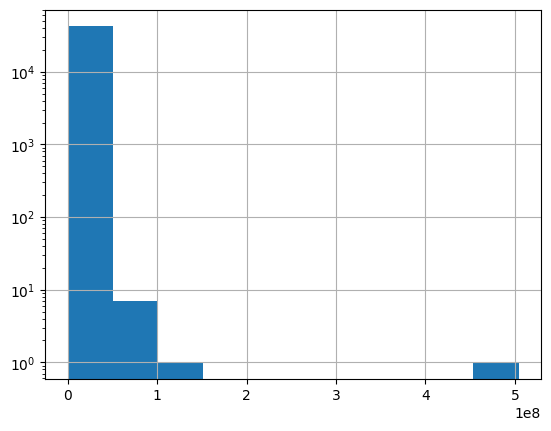

In [ ]:
#ищем выбросы с помощью гистограммы
#аргумент log используется для того, чтобы лучше видеть, где маленькая частота, а где - вообще нет значений
df['total_inc'].hist(log=True)

In [ ]:
#такой способ замены не самый читабельный, однако здесь он необходим, чтобы не трогать nan'ы
#альтернативно можно использовать 'df[~(df['total_inc'] > 4e8)]'
df = df.drop(df[df['total_inc'] > 4e8].index)

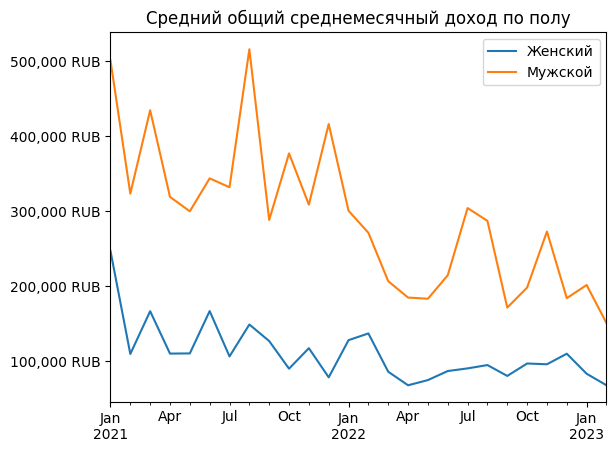

In [ ]:
out = df.groupby(['date', 'gender'], as_index = False)['total_inc'].mean()

fig, ax = plt.subplots()

out.set_index('date').groupby('gender')['total_inc'].plot()

ax.yaxis.set_major_formatter('{x:,.0f} RUB')

plt.title('Средний общий среднемесячный доход по полу')
plt.legend()
plt.xlabel('')
plt.show();

### Задание №3: кто больше тратит средств на детей - мамы или папы?


<Axes: >

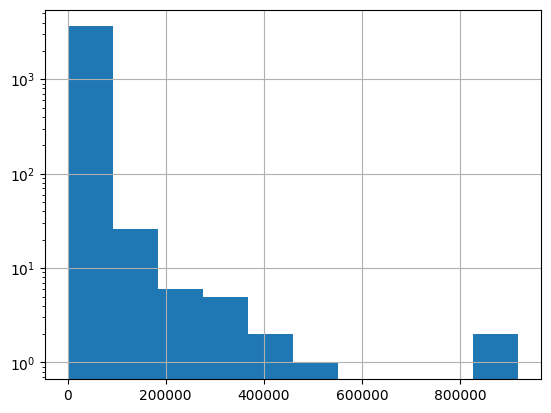

In [ ]:
df['amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__detskaja_odezhda'].hist(log=True)

<Axes: >

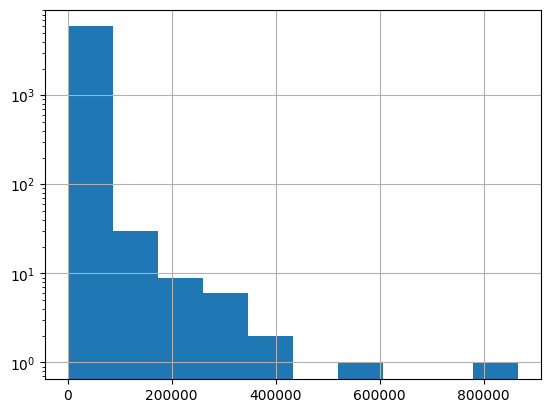

In [ ]:
df['amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__tovary_dlja_detej'].hist(log=True)

In [ ]:
df = df.drop(df[(df['amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__detskaja_odezhda'] > 6e5) |
 (df['amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__tovary_dlja_detej'] > 7e5)].index)

In [ ]:
df['child_exp'] = df['amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__detskaja_odezhda'] + df['amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__tovary_dlja_detej']

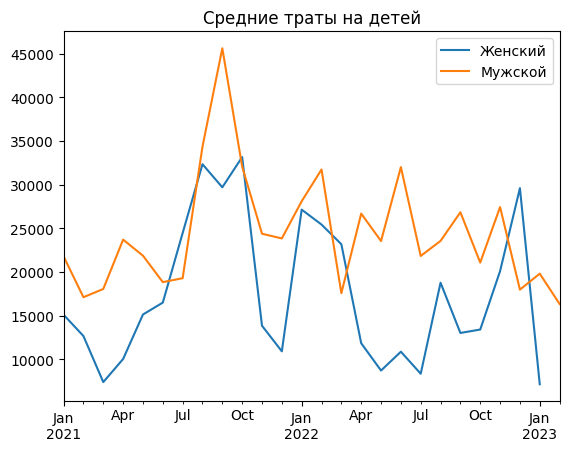

In [ ]:
df.groupby(['date', 'gender'], as_index = False)['child_exp'].mean().set_index('date').groupby('gender')['child_exp'].plot()

plt.title('Средние траты на детей')
plt.legend()
plt.xlabel('')
plt.show();

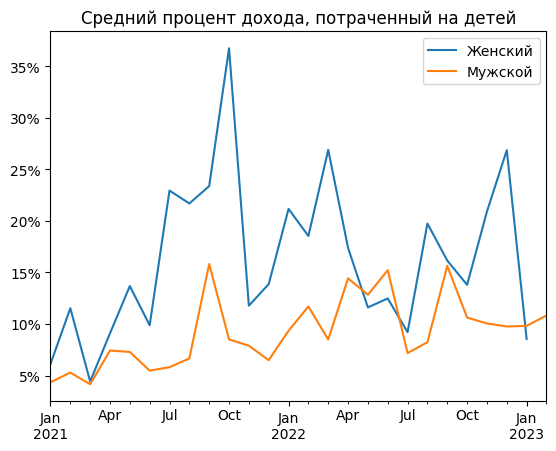

In [ ]:
out = df.groupby(['date', 'gender'], as_index = False)[['total_inc', 'child_exp']].mean()
out['rel_exp'] = out['child_exp'] / out['total_inc']

fig, ax = plt.subplots()

out.set_index('date').groupby('gender')['rel_exp'].plot()

ax.yaxis.set_major_formatter('{x:.0%}')

plt.title('Средний процент дохода, потраченный на детей')
plt.legend()
plt.xlabel('');

Итак, мужчины тратят больше денег на детей в абсолюте, но относительно дохода женщины тратят больше мужчин.

### Задание №4: оцените средние операционные доходы клиентов за 6 месяцев? Какие основные клиентские группы выделяются и как их можно охарактеризовать?    


In [ ]:
df['profit_income_out_rur_amt_6m'].describe()

count      49,996.00
mean        3,435.40
std        27,790.18
min      -250,274.83
25%            14.00
50%           367.00
75%         1,868.29
max     3,048,383.33
Name: profit_income_out_rur_amt_6m, dtype: float64

<Axes: >

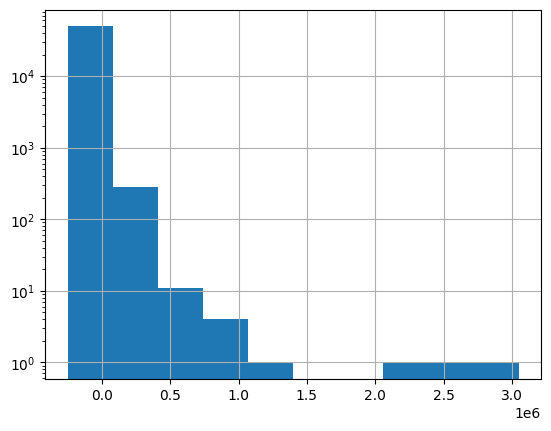

In [ ]:
df['profit_income_out_rur_amt_6m'].hist(log=True)

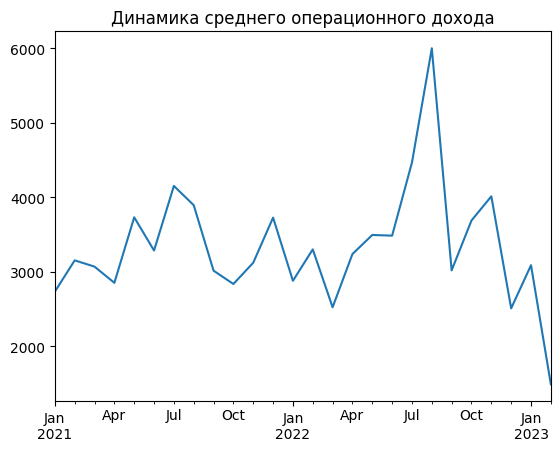

In [ ]:
df.groupby('date')['profit_income_out_rur_amt_6m'].mean().plot()
plt.xlabel('')
plt.title('Динамика среднего операционного дохода');

In [ ]:
#клиентские группы хорошо разделяются по сегментам
df.groupby('clientsegment')['profit_income_out_rur_amt_6m'].mean()

clientsegment
A-CLUB      75,801.89
AFFLUENT     8,196.07
MAFFLUENT    2,172.74
MASS           779.50
Name: profit_income_out_rur_amt_6m, dtype: float64

In [ ]:
#клиенты могут хорошо разбиваться по статусу после агрегации категорий
df.groupby('clientoutflowstatus')['profit_income_out_rur_amt_6m'].mean()

clientoutflowstatus
ACTIVE             4,065.79
LOCAL_WB             195.46
N2BANK_NEW            -2.42
N2BANK_POTENTIAL      -5.27
OUTFLOW              343.64
POTENTIAL              0.00
PREOUTFLOW           465.87
PREVYEARS_WB         298.89
SLEEP                428.14
Name: profit_income_out_rur_amt_6m, dtype: float64

In [ ]:
#клиенты также хорошо разбиваются по наличию зарплатного счета у клиента
df.groupby('accountsalary_flag')['profit_income_out_rur_amt_6m'].mean().sort_values()

accountsalary_flag
0.00     576.98
1.00   4,128.14
Name: profit_income_out_rur_amt_6m, dtype: float64

### Задание №5: оцените состав регионов в привязке средним операционным доходам клиентов и возрасту клиентов? Сделайте не менее 3 выводов   


In [ ]:
#слишком много регионов для визуализации, отберем топ 15 по кол-ву клиентов
df['addrref'].unique()

array(['г. Москва', 'Пензенская область', 'Омская область',
       'Краснодарский край', 'Приморский край', 'Ростовская область',
       'Республика Татарстан (Татарстан)',
       'Чувашская Респуб. - Чаваш Респуб.', 'Липецкая область',
       'Оренбургская область', nan, 'г. Санкт - Петербург',
       'Кемеровская область - Кузбасс', 'Челябинская область',
       'Волгоградская область', 'Алтайский край', 'Новосибирская область',
       'Республика Башкортостан', 'Республика Марий Эл',
       'Саратовская область', 'Свердловская область',
       'Сахалинская область', 'Красноярский край',
       'Нижегородская область', 'Московская область',
       'Калининградская область', 'Хабаровский край',
       'Ульяновская область', 'Пермский край', 'Владимирская область',
       'Курская область', 'Тульская область', 'Удмуртская Республика',
       'Мурманская область', 'Ставропольский край',
       'Ханты-Мансийский автономный окр.', 'Тверская область',
       'Белгородская область', 'Вороне

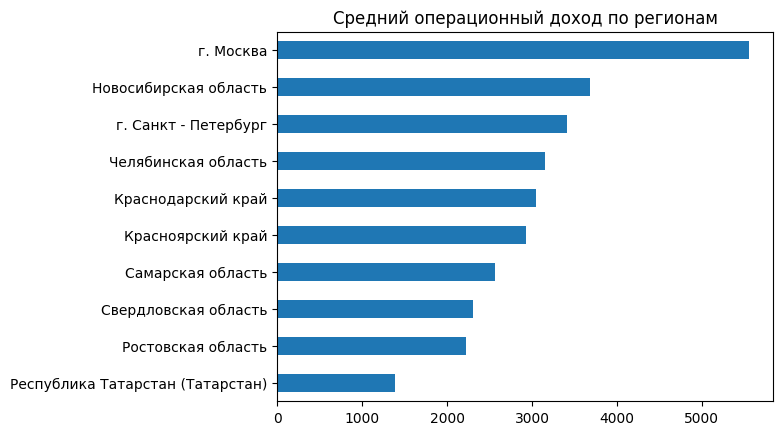

In [ ]:
df['addrref top 10'] = df['addrref'].isin(df['addrref'].value_counts().nlargest(10).index)

fig, ax = plt.subplots()

df[df['addrref top 10'] == True].groupby('addrref')['profit_income_out_rur_amt_6m'].mean().sort_values().plot(kind='barh')

plt.title('Средний операционный доход по регионам')
plt.ylabel('');

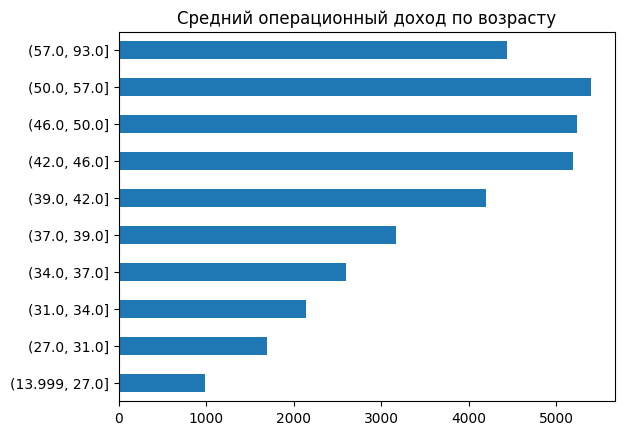

In [ ]:
df['age bin'] = pd.qcut(df['age'], 10)

df.groupby('age bin')['profit_income_out_rur_amt_6m'].mean().plot(kind='barh')

plt.title('Средний операционный доход по возрасту')
plt.ylabel('');

### Задание №6: жители каких субъектов тратят на кафе и развлечения больше, чем остальные?

<Axes: >

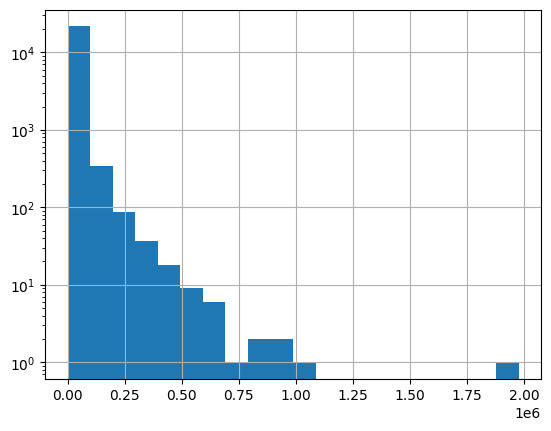

In [ ]:
cafe = 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__kafe'
entertain = 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__razvlechenija'

df[cafe].hist(bins=20, log=True)

<Axes: >

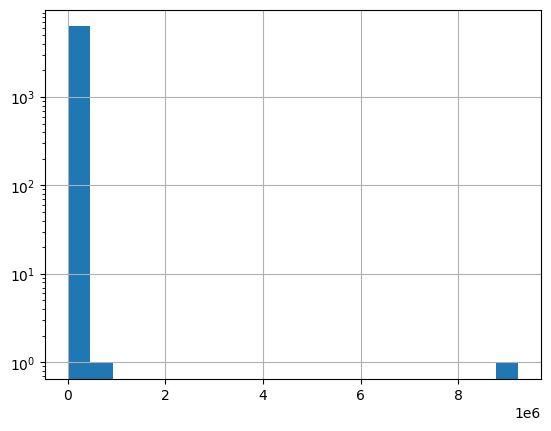

In [ ]:
df[entertain].hist(bins=20, log=True)

In [ ]:
df = df.drop(df[(df[cafe] > 1.5e6) |
 (df[entertain] > 3e5)].index)

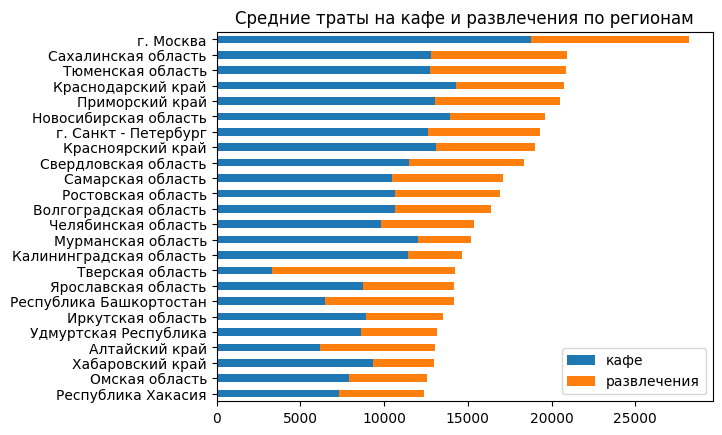

In [ ]:
out = df.groupby('addrref')[[cafe, entertain]].mean()

out['CE'] = out[cafe] + out[entertain]
out = out[out['CE'] > out['CE'].mean()].sort_values(by='CE')

out[[cafe, entertain]].plot(kind='barh', stacked=True)

plt.legend(['кафе', 'развлечения'])
plt.ylabel('')
plt.title('Средние траты на кафе и развлечения по регионам');

### Задание №7: какой сегмент клиентов распологаете наибольшим объемом средств на депозитах? Сколько средств в среднем приходится на 1 клиента из группы?

<Axes: >

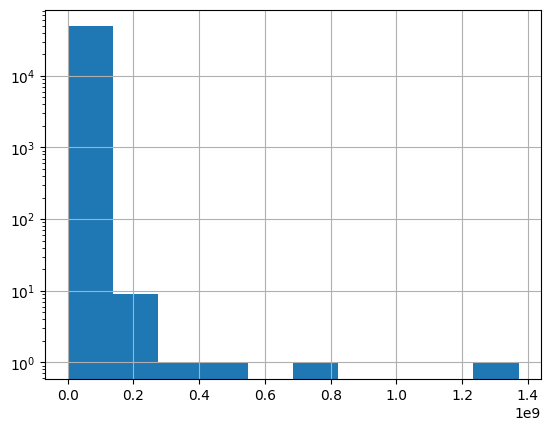

In [ ]:
df['depos_rur_amt_curr_v2'].hist(log=True)

In [ ]:
df = df.drop(df[df['depos_rur_amt_curr_v2'] > 1e9].index)

In [ ]:
#у огромного количества клиентов 0 на депозитах
#анализировать такое не интересно, скроем такие данные
df['depos_rur_amt_curr_v2'].value_counts().iloc[:10]

0.00            46786
1,000,000.00       21
500,000.00         17
1,400,000.00       14
300,000.00         14
1,500,000.00       14
2,000,000.00       14
100,000.00         13
5,000,000.00       10
3,000,000.00        8
Name: depos_rur_amt_curr_v2, dtype: int64

In [ ]:
out = df[df['depos_rur_amt_curr_v2'] > 0]

In [ ]:
out.groupby('clientsegment')['depos_rur_amt_curr_v2'].mean()

clientsegment
A-CLUB      42,357,912.99
AFFLUENT     3,753,681.29
MAFFLUENT      631,259.34
MASS           293,993.04
Name: depos_rur_amt_curr_v2, dtype: float64

In [ ]:
out.groupby('clientsegment')['depos_rur_amt_curr_v2'].sum()

clientsegment
A-CLUB      6,353,686,948.00
AFFLUENT    5,108,760,241.00
MAFFLUENT     467,131,909.00
MASS           66,442,427.00
Name: depos_rur_amt_curr_v2, dtype: float64

In [ ]:
df['clientsegment'].value_counts()

MASS         25729
MAFFLUENT    12724
AFFLUENT      9565
A-CLUB         592
Name: clientsegment, dtype: int64

Итак, несмотря на малую численность A-CLUB, сумма депозитов на их счетах все равно больше.

### Задание №8: какие кредитные продукты являются самыми популярными у клиентов банка?

In [ ]:
df = df.rename({'hdb_bki_total_auto_cnt' : 'авто',
                'hdb_bki_total_cc_cnt' : 'кредитка',
                'hdb_bki_total_ip_cnt' : 'ипотека',
                'hdb_bki_total_pil_cnt' : 'кредит',
                'hdb_bki_total_products' : 'все',
                }, axis=1)

<Axes: >

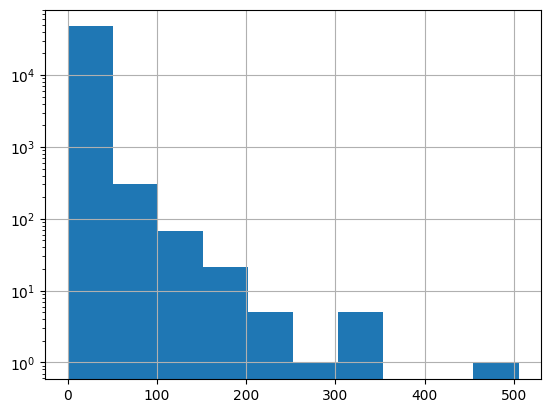

In [ ]:
df['все'].hist(log=True)

In [ ]:
#среднее количество кредитных продуктов по сегменту
df.groupby('clientsegment')[['авто','кредитка', 'ипотека', 'кредит', 'все']].mean()

,авто,кредитка,ипотека,кредит,все
clientsegment,,,,,
A-CLUB,0.79,2.98,0.66,1.93,4.61
AFFLUENT,0.77,4.57,0.80,4.06,7.38
MAFFLUENT,0.45,5.53,0.59,5.54,9.04
MASS,0.26,5.59,0.34,6.27,9.77


In [ ]:
b_credit = []
for col in ['авто','кредитка', 'ипотека', 'кредит', 'все']:
  col_name = ('if ' + col if col != 'все' else 'любой')
  b_credit.append(col_name)
  df[col_name] = df[col] > 0

In [ ]:
#процент клиентов с хотя бы одним из кредитных продуктов соот. категории
df.groupby('clientsegment')[b_credit].mean()

,if авто,if кредитка,if ипотека,if кредит,любой
clientsegment,,,,,
A-CLUB,0.29,0.73,0.25,0.41,0.80
AFFLUENT,0.32,0.77,0.38,0.62,0.86
MAFFLUENT,0.21,0.79,0.32,0.71,0.86
MASS,0.12,0.80,0.21,0.76,0.87


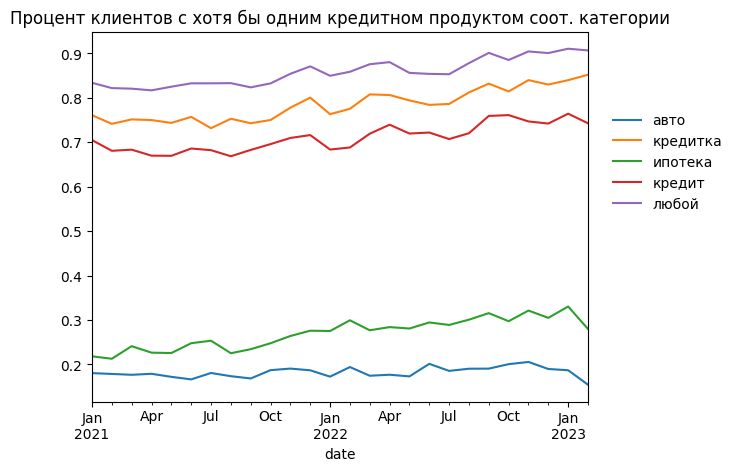

In [ ]:
df.groupby('date')[b_credit].mean().plot(legend=True)

plt.title('Процент клиентов с хотя бы одним кредитном продуктом соот. категории')
plt.legend([value  if ' ' not in value else value.split(' ')[1] for value in b_credit], loc=(1.04, 0.5), frameon=False)
ax.yaxis.set_major_formatter('{x:.0%}')
plt.show();

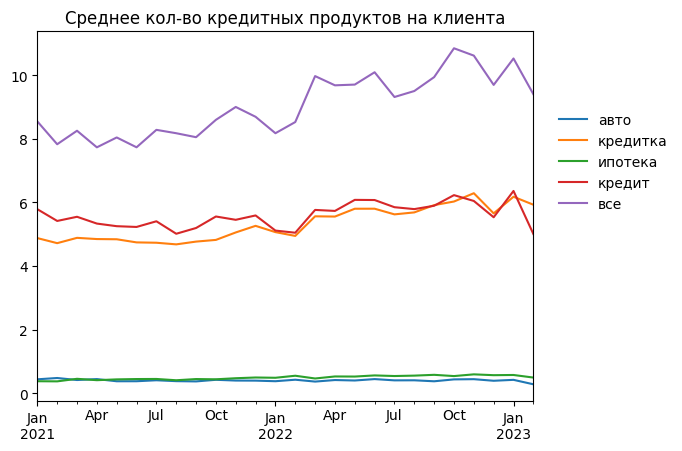

In [ ]:
df.groupby('date')[['авто','кредитка', 'ипотека', 'кредит', 'все']].mean().plot()
plt.title('Среднее кол-во кредитных продуктов на клиента')
plt.xlabel('')
plt.legend(loc=(1.04, 0.5), frameon=False);

Один интересный результат, который можно заметить из двух графиков выше - динамика среднего кол-во ипотек и авто кредитов на клиента очень похожа, однако кол-во клиентов с хотя бы одной ипотек выше. Это может говорить о том, что человек с большей вероятностью возьмет несколько авто кредитов, чем несколько ипотек.

### Задание №9: экстраполируя данные датасета на все население России, подтвердите/опровергните утверждение, что население России сильно закредитовано?

<Axes: >

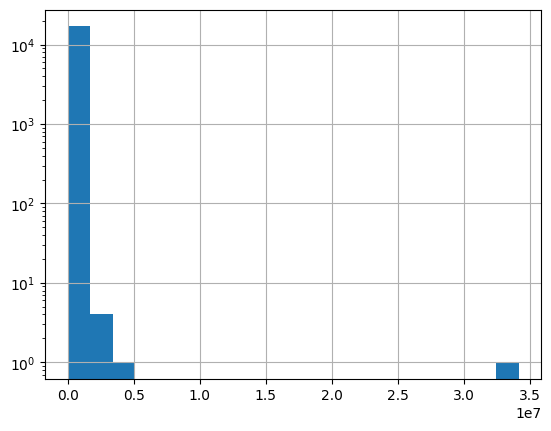

In [ ]:
df['hdb_other_month_payments_sum'].hist(bins=20, log=True)

In [ ]:
df = df.drop(df[df['hdb_other_month_payments_sum'] > 1e7].index)

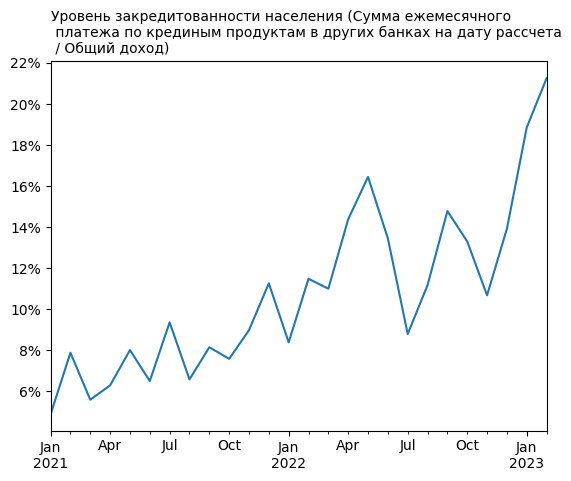

In [ ]:
out = df.groupby('date')[['hdb_other_month_payments_sum', 'total_inc']].mean()
out['закредитованность'] = out['hdb_other_month_payments_sum'] / out['total_inc']

fig, ax = plt.subplots()

out['закредитованность'].plot()

plt.title('Уровень закредитованности населения (Сумма ежемесячного\n платежа по крединым продуктам в других банках на дату рассчета\n / Общий доход)', fontdict={'fontsize' : 10}, loc='left')
ax.yaxis.set_major_formatter('{x:.0%}')
plt.xlabel('');

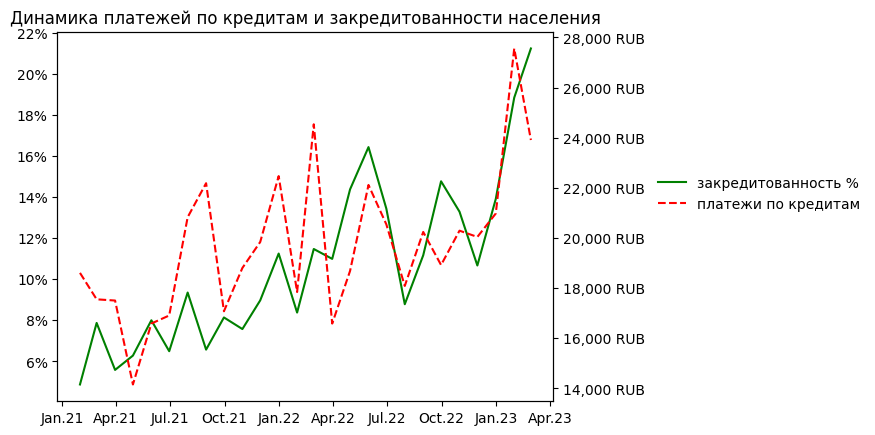

In [ ]:
out = df.groupby('date')[['hdb_other_month_payments_sum','total_inc']].mean()
out['закредитованность'] = out['hdb_other_month_payments_sum'] / out['total_inc']

fig, ax = plt.subplots()

ax.plot(out['закредитованность'], 'g-', label='закредитованность %')

ax2 = ax.twinx()
ax2.plot(out['hdb_other_month_payments_sum'], 'r--', label='платежи по кредитам')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b.%y'))
ax.yaxis.set_major_formatter('{x:.0%}')
ax2.yaxis.set_major_formatter('{x:,.0f} RUB')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, frameon=False, loc=(1.2, 0.5))
plt.title('Динамика платежей по кредитам и закредитованности населения');

Высоким уровнем закредитованности можно считать >30%, так что мы отвергаем гипотезу о закредитованности населения.

### Задание №10: Выделите группы клиентов, которая по вашему мнению является закредитованной? Обоснуйте свои выводы.

Выделить группы клиентов можно огромным количеством способов. Вот некоторые из них:
* Использовать KMeans (или любой другой метод кластеризации), куда будет включена переменная закредитованности, построить график средних и посмотреть на кластеры с большим средним значением этой переменной. Для гарантии того, что кластеризация приоритетно пойдет по переменной закредитованности, можно после стандартизации умножить только эту переменную на константу больше 1. Это, однако, займет много времени, и не совсем вписывается в формат этого ноутбука.
* Построить коррелограмму. Для этого потребуется one hot encoding категориальных переменных (как и для кластеризации).
* Использование ассоциативных правил, что потребует бинарное кодирование всех переменных.  

Я воспользуюсь другим способом. Я составлю список переменных - кандидатов на связь с таргетируемой переменной, который я засуну в генератор. После, с помощью `groupby` я посмотрю среднее по каждой категории, из чего я сделаю вывод о группах клиентов. Такой подход требует минимальных затрат времени, но его эффективность полностью зависит от успешного выбора кандидатов.

<Axes: >

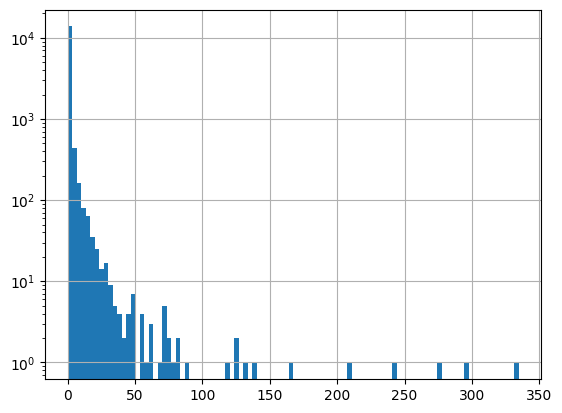

In [ ]:
df['credit load'] = df['hdb_other_month_payments_sum'] / df['total_inc']

df['credit load'].hist(bins=100, log=True)

In [ ]:
out = df[~df['credit load'].isna()]
out['credit load']

5       0.70
14      0.02
15      0.00
20      0.39
22      0.00
        ... 
49991   9.47
49992   0.08
49994   0.65
49995   0.02
49998   0.18
Name: credit load, Length: 14705, dtype: float64

In [ ]:
out['high_credit_load'] = np.where(out['credit load'] >= 0.35, 'Закредитован', 'Не закредитован')

out['high_credit_load b'] = np.where(out['credit load'] >= 0.35, 1, 0)
out['high_credit_load'].value_counts()

<ipython-input-134-d2cce3d0157b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['high_credit_load'] = np.where(out['credit load'] >= 0.35, 'Закредитован', 'Не закредитован')
<ipython-input-134-d2cce3d0157b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['high_credit_load b'] = np.where(out['credit load'] >= 0.35, 1, 0)


Не закредитован    8805
Закредитован       5900
Name: high_credit_load, dtype: int64

In [ ]:
cols = (col for col in ['accountsalary_flag', 'clientoutflowstatus', 'clientsegment', 'age bin', 'addrref',
                        *b_credit, 'авто','кредитка', 'ипотека', 'кредит', 'все', 'life_time_days', 'days_to_last_transaction',
                        'avg_amount_daily_transactions_30d', 'avg_cnt_daily_transactions_30d', 'avg_credit_turn_rur',
                        'avg_cur_cr_turn', 'avg_invest_inc', 'avg_percents_inc', 'avg_save_cr_turn', 'avg_save_db_turn',
                        'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__alkogol', 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__kafe',
                        'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__razvlechenija', 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__taksi',
                        'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__puteshestvija'])

In [ ]:
#данный код идет по обозначенным выше переменным и
# 1) смотрит среднее значение просматриваемой переменной по категориям Закредитован и Незакредитован,
# если так нельзя (просматриваемая переменная - категориальная), то 2) смотрит долю закредитованных клиентов по
# категориям просматриваемой переменной
column = next(cols)

try:
  print(out.groupby('high_credit_load')[column].mean())
except Exception:
  print(out.groupby(column)['high_credit_load b'].mean())

high_credit_load
Закредитован      0.73
Не закредитован   0.84
Name: accountsalary_flag, dtype: float64


Критерии закредитованных клиентов:
* Из сегмента MAFFLUENT или MASS
* Из Ивановской, Московской или Курской области
* Есть ипотека
* Редко проводят транзакции в банке
* Низкий средний кредитный оборот по текущим и накопительным счетам
* Низкий средний дебетовый оборот по накопительным счетам
* Очень низкий доход от инвестиций или процентов
* Сравнительно низкие траты на алкоголь, кафе, развлечения, такси и путешествия

### Задание №11: Правда ли, что с ипотекой люди перестают тратить средства на развлечения?

In [ ]:
df.groupby('if ипотека')[entertain].mean()

if ипотека
False   7,259.28
True    7,608.23
Name: amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__razvlechenija, dtype: float64

In [ ]:
#я смотрю на size чтобы понять, насколько можно доверять категории
#в категориях от 0 до 6 ипотек достаточно наблюдений, чтобы сделать значимый вывод
df.groupby('ипотека').agg({entertain : ['mean', 'size']})

amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__razvlechenija  \
                                                                                   mean   
ипотека                                                                                   
0.00                                              6,986.17                                
1.00                                              7,175.71                                
2.00                                              7,458.91                                
3.00                                              7,710.79                                
4.00                                             11,385.66                                
5.00                                              6,927.03                                
6.00                                              5,976.60                                
7.00                                              8,373.33                                
8.00                                              6,995.00                                
9.00                                             59,030.00                                
10.00                                            49,169.00                                
11.00                                             2,500.00                                
12.00                                            13,010.00                                
13.00                                                  NaN                                
15.00                                               350.00                                
17.00                                            15,098.00                                

                
          size  
ипотека         
0.00     29466  
1.00      8902  
2.00      2795  
3.00      1056  
4.00       487  
5.00       181  
6.00        78  
7.00        25  
8.00        11  
9.00         8  
10.00        4  
11.00        1  
12.00        3  
13.00        2  
15.00        1  
17.00        1

<Axes: ylabel='ипотека'>

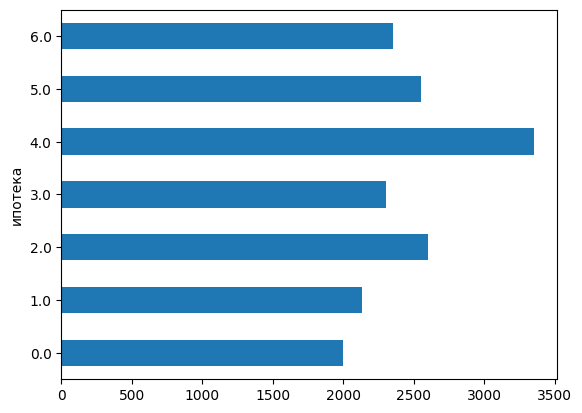

In [ ]:
out = df.groupby('ипотека')[entertain].median()
out[list(i for i in range(7))].plot(kind='barh')

Итак, люди с ипотекой не тратят меньше средств на развлечения.  
Аномальный результат в категории '4 ипотеки' заставил меня перепроверить гистограмму, но там не было выбросов. Видимо, это просто случайное совпадение.

### Задание №12: Какая группа клиентов тратит на образование больше всего средства? Охарактеризуйте группу по не менее чем 3 признакам

In [ ]:
educ = 'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__obrazovanie'

df[educ].value_counts()

1,000.00      58
2,000.00      49
500.00        42
3,000.00      42
5,000.00      41
              ..
7,790.00       1
17,690.00      1
16,749.00      1
803,157.23     1
24,800.00      1
Name: amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__obrazovanie, Length: 2455, dtype: int64

In [ ]:
cols = (col for col in ['accountsalary_flag', 'clientoutflowstatus', 'clientsegment', 'age bin', 'addrref',
                        *b_credit, 'авто','кредитка', 'ипотека', 'кредит', 'все', 'life_time_days', 'days_to_last_transaction',
                        'avg_amount_daily_transactions_30d', 'avg_cnt_daily_transactions_30d', 'avg_credit_turn_rur',
                        'avg_cur_cr_turn', 'avg_invest_inc', 'avg_percents_inc', 'avg_save_cr_turn', 'avg_save_db_turn',
                        'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__alkogol', 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__kafe',
                        'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__razvlechenija', 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__taksi',
                        'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__puteshestvija'])

<Axes: xlabel='amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__obrazovanie', ylabel='avg_save_db_turn'>

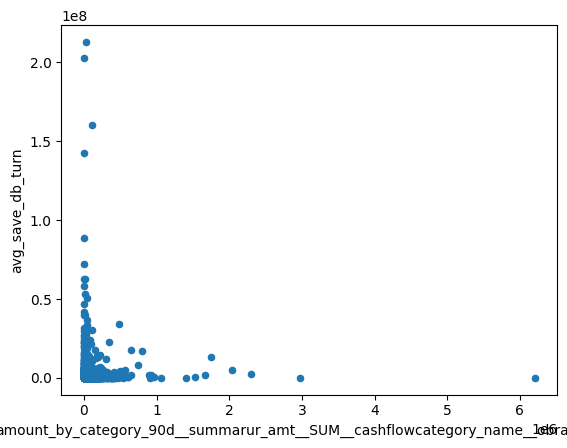

In [ ]:
#такие группы ищутся по коду с генератором выше, и по scatter plot'ам
df.plot.scatter(educ, 'avg_save_db_turn')

Критерии клиентов, тратящих на образование больше всего средств:
* есть зарплатный счет
* AFFLUENT или A-CLUB сегмент
* от 57 до 93 лет - довольно странный результат, скорее всего, они платят за детей/внуков/других родственников
* из Волгоградской области или Алтайского края
* нет кредитки, ипотеки, кредита

### Задание №13: Какая группа клиентов чаще всего пользуется заправками? Охарактеризуйте группу по не менее чем 3 признакам

<Axes: >

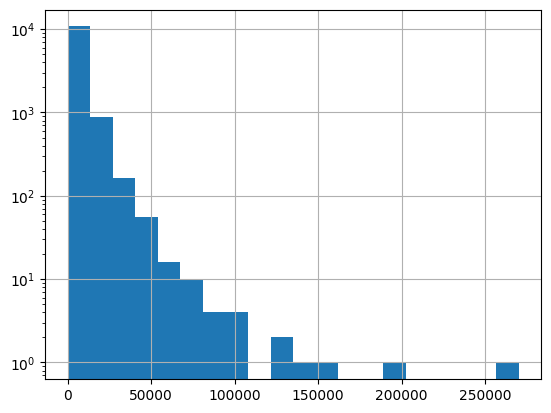

In [ ]:
gas_st = 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__avtozapravki'
df[gas_st].hist(bins=20, log=True)

In [ ]:
cols = (col for col in ['accountsalary_flag', 'clientoutflowstatus', 'clientsegment', 'age bin', 'addrref',
                        *b_credit, 'авто','кредитка', 'ипотека', 'кредит', 'все', 'life_time_days', 'days_to_last_transaction',
                        'avg_amount_daily_transactions_30d', 'avg_cnt_daily_transactions_30d', 'avg_credit_turn_rur',
                        'avg_cur_cr_turn', 'avg_invest_inc', 'avg_percents_inc', 'avg_save_cr_turn', 'avg_save_db_turn',
                        'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__alkogol', 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__kafe',
                        'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__razvlechenija', 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__taksi',
                        'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__puteshestvija'])

In [ ]:
#стандартный перебор параметров
column = next(cols)


if len(df[column].unique()) > 10 and not pd.api.types.is_object_dtype(df.dtypes[column]):
  df.plot.scatter(gas_st, column)
else:
  print(df.groupby(column)[gas_st].mean())

accountsalary_flag
0.00   2,987.37
1.00   6,067.14
Name: amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__avtozapravki, dtype: float64


Такие клиенты:
* имеют зарплатный счет
* активные
* A-CLUB сегмента
* от 39 лет

### Задание №14: Правда ли, что с увеличением возраста клиенты траться на ЗДОРОВЬЕ больше срества?

<Axes: >

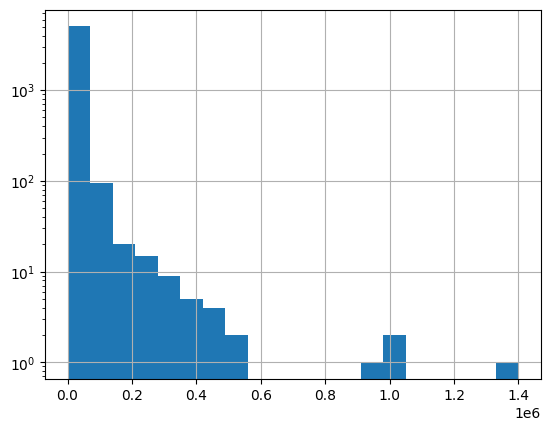

In [ ]:
health = 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__zdorove'

df[health].hist(bins=20, log=True)

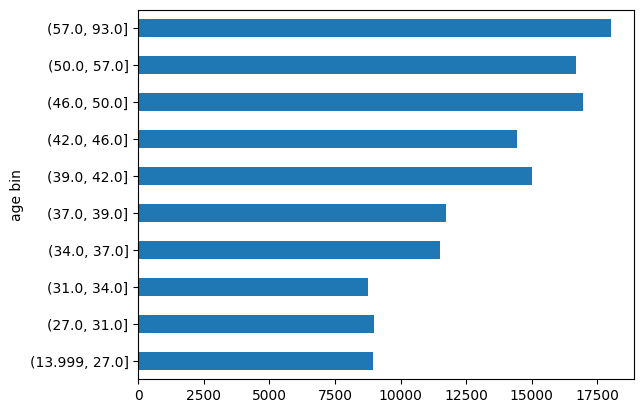

In [ ]:
df.groupby('age bin')[health].mean().plot(kind='barh');

Да, это правда

### Задание №15: Насколько клиенты банка склонны к употреблению алкоголя?

<Axes: >

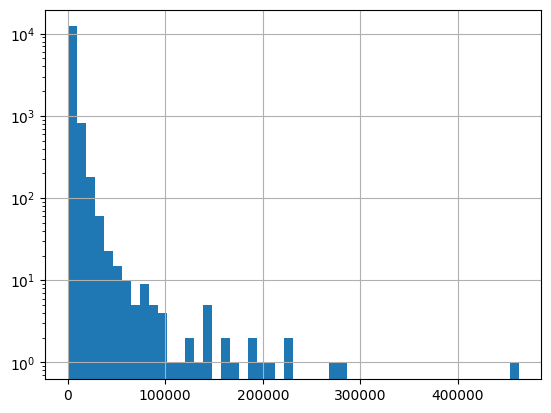

In [ ]:
alcohol = 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__alkogol'

df[alcohol].hist(bins=50, log=True)

In [ ]:
df = df[~(df[alcohol] > 2.5e5)]

<Axes: xlabel='date'>

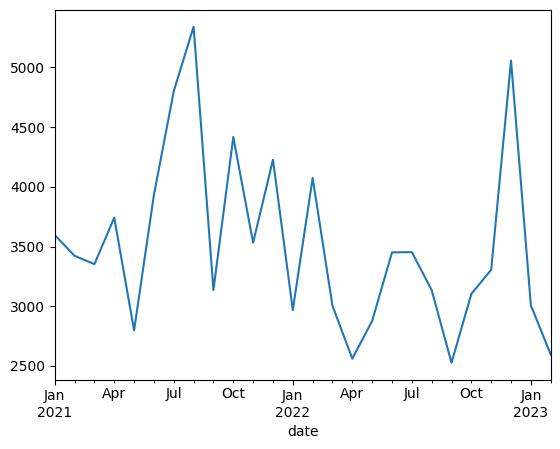

In [ ]:
df.groupby('date')[alcohol].mean().plot()

<Axes: ylabel='age bin'>

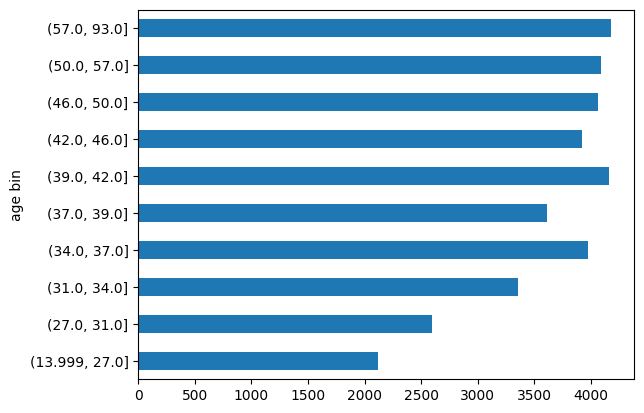

In [ ]:
df.groupby('age bin')[alcohol].mean().plot(kind='barh')

In [ ]:
pd.pivot_table(df, index='age bin', columns='clientsegment', values=alcohol, aggfunc=['mean', 'median'])

mean                                median           \
clientsegment     A-CLUB AFFLUENT MAFFLUENT     MASS    A-CLUB AFFLUENT   
age bin                                                                   
(13.999, 27.0]    133.50 2,687.07  2,511.10 1,902.60    133.50   993.00   
(27.0, 31.0]    8,667.05 4,164.96  2,614.72 2,018.31    469.90 1,771.99   
(31.0, 34.0]    3,898.81 5,603.61  3,356.46 2,050.06  3,555.00 2,688.59   
(34.0, 37.0]   19,088.78 6,474.49  3,085.20 2,249.88  7,990.00 3,042.00   
(37.0, 39.0]    6,665.80 5,774.67  2,897.62 1,948.77  7,579.72 2,478.41   
(39.0, 42.0]   16,337.25 6,229.70  3,456.03 1,743.21  5,324.06 2,477.22   
(42.0, 46.0]   14,830.73 5,977.20  2,696.96 1,785.47  6,057.50 2,576.90   
(46.0, 50.0]   10,102.28 6,561.85  3,018.84 1,866.59  3,802.99 2,870.00   
(50.0, 57.0]   17,793.85 6,361.22  2,632.64 1,736.78  5,944.50 2,540.53   
(57.0, 93.0]   16,667.66 6,000.40  4,460.35 1,394.81 12,263.76 2,141.78   

                                   
clientsegment  MAFFLUENT     MASS  
age bin                            
(13.999, 27.0]  1,327.00   782.62  
(27.0, 31.0]    1,296.79   963.86  
(31.0, 34.0]    1,481.70 1,150.00  
(34.0, 37.0]    1,508.07 1,078.77  
(37.0, 39.0]    1,546.37   895.00  
(39.0, 42.0]    1,507.10   699.95  
(42.0, 46.0]    1,189.40 1,033.55  
(46.0, 50.0]    1,522.95   867.58  
(50.0, 57.0]    1,352.49   835.72  
(57.0, 93.0]    1,405.00   745.90

Анализ склонности к употреблению алкоголя сильно затруднен тем фактом, что у нас нет разбиения по типу приобретаемого алкоголя. Так, определим эту склонность как покупку (употребление) 2 бутылок вина в неделю, вино в среднем стоит по 800 рублей -> 1600 рублей в неделю -> около 6,5 тысячи рублей в месяц.  

Учитывая, что люди из более 'богатых' сегментов покупают более дорогой алкоголь, можно сказать, что клиенты банка не склонны к употреблению алкоголя.

### Задание №16: Для каждого клиента определите топ-3 самых желанных категорий кэшбэка. Какие категории станут самыми популярными для всех клиентов?

In [ ]:
#создаем лист переменных - категорий затрат
cat_list = [cat for cat in df.columns if 'amount_by_category_30d' in cat]
#используя лист выше, создаем словарь 'название колонки на английском' - 'адекватное (короткое) описание на русском'
cat_dict = desc.set_index('name_eng').loc[cat_list, 'name_rus'].apply(lambda x: x.split(' - ')[-1].lower()).to_dict()

#переводим DataFrame затрат в numpy array (методом values) для аргсортировки numpy'ем
#переводим затраты в минус, так как аргсортировка только по возрастанию
#берем в каждой строке 3 первых значения
#получили 2d numpy array, где каждая строка содержит 3 индекса топ категорий
#для наблюдения в оригинальном дата фрейме
cat_iarray = np.argsort(-df[cat_list].values, axis=1)[:, :3]

#берем только адекватное описание на русском, переводим в numpy array
#иначе метод 'cat_i2desc' не сработает
cat_rus = np.array(list(cat_dict.values()))

#получаем из индексов категорий их описание
cat_i2desc = lambda x: cat_rus[x]
top_cats = cat_i2desc(cat_iarray)
top_cats

array([['алкоголь', 'зарубежные финансовые операции',
        'выдача наличных в банкомате'],
       ['алкоголь', 'зарубежные финансовые операции',
        'выдача наличных в банкомате'],
       ['зарубежные финансовые операции', 'гипермаркеты', 'супермаркеты'],
       ...,
       ['алкоголь', 'зарубежные финансовые операции',
        'выдача наличных в банкомате'],
       ['cотовая связь', 'кафе', 'продукты'],
       ['переводы с карты на карту', 'продукты', 'гипермаркеты']],
      dtype='<U30')

In [ ]:
df[['top_cat1', 'top_cat2', 'top_cat3']] = top_cats
df[['top_cat1', 'top_cat2', 'top_cat3']]

<ipython-input-154-98980b55c92e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['top_cat1', 'top_cat2', 'top_cat3']] = top_cats
<ipython-input-154-98980b55c92e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['top_cat1', 'top_cat2', 'top_cat3']] = top_cats
<ipython-input-154-98980b55c92e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,top_cat1,top_cat2,top_cat3
0,алкоголь,зарубежные финансовые операции,выдача наличных в банкомате
1,алкоголь,зарубежные финансовые операции,выдача наличных в банкомате
2,зарубежные финансовые операции,гипермаркеты,супермаркеты
3,выдача наличных в банкомате,алкоголь,зарубежные финансовые операции
4,переводы с карты на карту,выдача наличных в банкомате,электронные деньги
...,...,...,...
49995,продукты,автозаправки,супермаркеты
49996,выдача наличных в банкомате,кафе,алкоголь
49997,алкоголь,зарубежные финансовые операции,выдача наличных в банкомате
49998,cотовая связь,кафе,продукты


Это было самое сложное задание из всего ноутбука. Примечательно, что, если у клиента нет трат ни по одной из категорий, то numpy присваивает топ категории `алкоголь`,	`зарубежные финансовые операции` и	`выдача наличных в банкомате`, что странно, так как индекс этих категорий 0, 29 и 30 при длинне `categories` 33.


<Axes: >

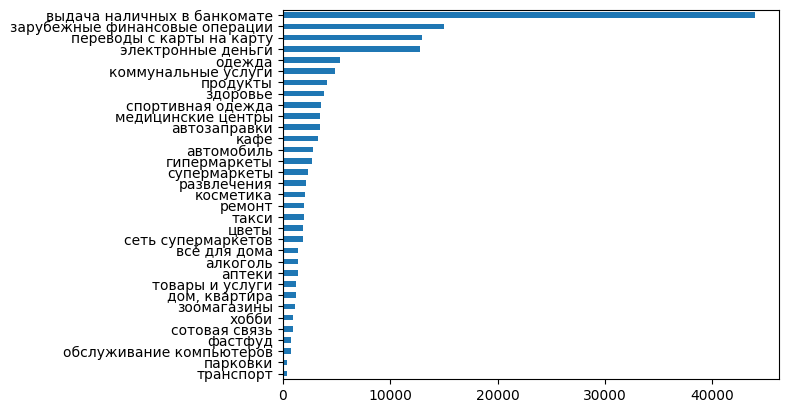

In [ ]:
out = df[cat_list].median()
out.index = cat_dict.values()
out.sort_values().plot(kind='barh')

Самые востребованные категории кэшбека у всех клиентов:
* выдача наличных в банкомате
* зарубежные финансовые операции
* переводы с карты на карту

### Проверка гипотезы №1: Стоит ли стимулировать с помощью повышенного кэшбэка в категории 'бытовая техника' клиентов, у которых есть ипотека?

<Axes: >

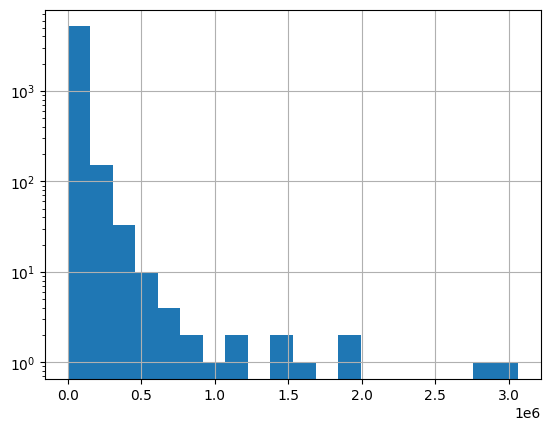

In [ ]:
apl = 'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__bytovaja_tehnika'
df[apl].hist(bins=20, log=True)

In [ ]:
df = df[~(df[apl] > 2.5e6)]

In [ ]:
df.groupby('if ипотека')[apl].mean()

if ипотека
False   30,162.71
True    32,260.88
Name: amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__bytovaja_tehnika, dtype: float64

Наличие ипотеки незначительно увеличивает затраты на бытовую технику. Так, дополнительно стимулировать таких клиентов с помощью повышенного кэшбека не стоит.

### Проверка гипотезы №2: Можно ли "прожить" на доходы от инвестиций и проценты по вкладам? Как можно описать портфет человека, который живет на подобные доходы?  

Примем доход в 40 тысяч рублей как необходимый уровень для того, чтобы прожить на инвестиции и проценты по вкладам.

<Axes: >

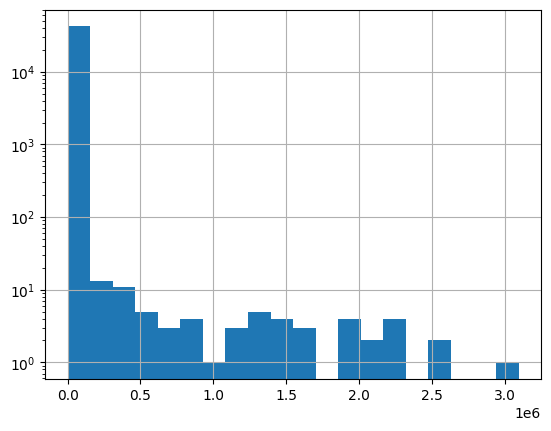

In [ ]:
#avg_invest_inc, avg_percents_inc
df.loc[df['avg_invest_inc'] < 3.5e6, 'avg_invest_inc'].hist(bins=20, log=True)

<Axes: >

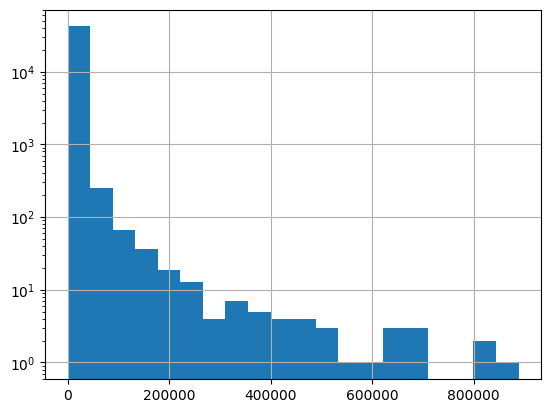

In [ ]:
df.loc[df['avg_percents_inc'] < 1e6, 'avg_percents_inc'].hist(bins=20, log=True)

In [ ]:
df = df[~((df['avg_invest_inc'] > 3.5e6) | (df['avg_percents_inc'] > 1e6))]

<Axes: >

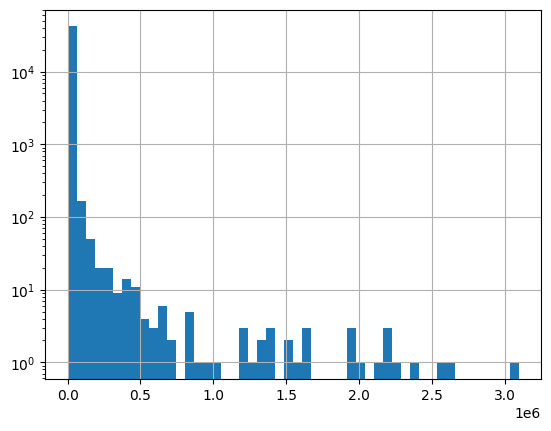

In [ ]:
df['inv income'] = df['avg_invest_inc'] + df['avg_percents_inc']

<Axes: >

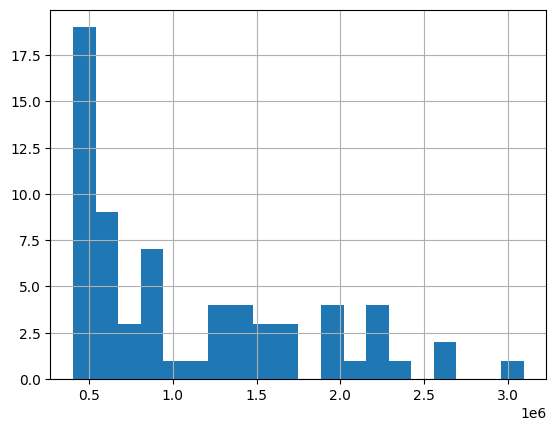

In [ ]:
df.loc[df['inv income'] >= 4e5, 'inv income'].hist(bins=20)

In [ ]:
(df['inv income'] >= 4e5).sum(), (df['inv income'] >= 4e5).mean()

(67, 0.0013408044826896137)

Только 67 клиентов, или 0,13%, могут прожить на инвестиции и проценты. Так как эта сумма незначительно отличается от нуля, принимаем, что на инвестиции и проценты прожить нельзя.

Мы все равно можем составить портрет человека, живущего на такие доходы. Для этого определим, что, если человек живет на доходы от инвестиций и процентов, это значит, что большая часть его дохода идет из этих источников.

In [ ]:
df_inv = df[(df['inv income'] >= 4e5) & (df['inv income'] / df['total_inc'] > 0.5)]
df_inv.head(5)

,fio,client_id,date,accountsalary_flag,country,profit_income_out_rur_amt_6m,clientoutflowstatus,curbal_usd_amt_cm_avg,stratsegfactor,srvpackage,clientsegment,age,gender,addrref,life_time_days,profit_income_out_rur_amt_3m,profit_income_out_rur_amt_12m,profit_income_out_rur_amt_9m,turn_save_db_sum_v2,card_dda_rur_amt_3m_avg,depos_rur_amt_curr_v2,total_inc,dda_rur_amt_3m_avg,accum_rur_amt_3m_avg,dda_rur_amt_cm_avg,card_dda_rur_amt_curr_v2,sal_rur_amt_curr_v2,diff_save_cr_db_turn,depos_rur_amt_3m_avg,turn_save_db_avg_act_v2,total_rur_amt_cm_avg,depos_rur_amt_cm_avg,accum_rur_amt_cm_avg,total_rur_amt_curr_v2,diff_cur_cr_db_turn,curr_rur_amt_curr_v2,total_rur_amt_3m_avg,accum_rur_amt_curr_v2,curr_rur_amt_3m_avg,turn_fdep_cr_avg_act_v2,cred_dda_rur_amt_curr_v2,tda_rur_amt_3m_avg,curr_rur_amt_cm_avg,days_to_last_transaction,by_category__amount__SUM__eoperation_type_name__perevod_po_nomeru_telefona,by_category__amount__SUM__eoperation_type_name__vneshnij_perevod_rur,avg_amount_daily_transactions_30d,avg_amount_daily_transactions_90d,avg_cnt_daily_transactions_30d,avg_cnt_daily_transactions_90d,...,hdb_bki_active_max_limit,hdb_bki_active_oth_cnt,hdb_bki_active_pil_cnt,hdb_bki_active_pil_max_limit,hdb_bki_active_pil_max_outstand,hdb_bki_last_product_days,hdb_bki_other_active_cc_month_payments_sum,hdb_bki_other_active_cc_outstanding,hdb_bki_other_active_ip_month_payments_sum,hdb_bki_other_active_ip_outstanding,hdb_bki_other_active_pil_month_payments_sum,hdb_bki_other_active_pil_outstanding,hdb_bki_total_active_products,авто,hdb_bki_total_auto_last_days,hdb_bki_total_auto_max_limit,кредитка,hdb_bki_total_cc_last_days,hdb_bki_total_cc_max_limit,hdb_bki_total_cnt,hdb_bki_total_currency,ипотека,hdb_bki_total_ip_last_days,hdb_bki_total_ip_max_limit,hdb_bki_total_max_limit,hdb_bki_total_oth_cnt,кредит,hdb_bki_total_pil_last_days,hdb_bki_total_pil_max_limit,все,hdb_other_active_credits_count,hdb_other_active_mean_psk,hdb_other_active_min_psk,hdb_other_credits_count,hdb_other_month_payments_sum,hdb_outstand_sum,hdb_relend_client_credits_count_grade,child_exp,addrref top 10,age bin,if авто,if кредитка,if ипотека,if кредит,любой,credit load,top_cat1,top_cat2,top_cat3,inv income
335,Жуков Давыд Терентьевич,29984,2021-10-31,1.00,RUS,"-20,661.33",ACTIVE,"3,696.00",Пакет услуг,А-Клуб,A-CLUB,45.00,Мужской,Новосибирская область,"3,699.00","-34,191.33","-9,722.83","-13,942.89","101,779,089.67",0.00,"1,003,930.00","747,852.00","67,861,165.00","67,230,775.00","25,345,337.00",0.00,"3,099.00","-13,627,158.00","4,731,206.00","25,444,772.42","34,638,711.00","9,293,374.00","24,689,668.00","44,679,681.00","119,679.00","296,746.00","72,592,371.00","43,379,005.00","630,390.00","38,985,860.33",0.00,"4,731,206.00","515,752.00",1.00,"80,320.93","394,958.47","20,389.32","18,783.70",4.37,6.26,...,NaN,0.00,0.00,NaN,NaN,"2,472.00",NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,5.00,"2,472.00","150,000.00",42.00,1.00,0.00,NaN,NaN,"534,000.00",0.00,2.00,"5,452.00","534,000.00",6.00,0.00,0.00,0.00,6.00,NaN,0.00,NaN,NaN,True,"(42.0, 46.0]",False,True,False,True,True,NaN,"дом, квартира",выдача наличных в банкомате,обслуживание компьютеров,"1,669,251.00"
2174,Фролов Сильвестр Феодосьевич,11441,2022-08-31,1.00,MDA,"6,990.00",ACTIVE,"2,416.00",Предиктивный доход,Технический,MAFFLUENT,38.00,Мужской,г. Москва,"1,364.00","6,157.33","4,039.75","4,923.67",NaN,0.00,0.00,"149,263.00","228,652.00",0.00,"248,867.00",0.00,0.00,0.00,0.00,NaN,"248,867.00",0.00,0.00,"58,818.00","-46,969.00","58,818.00","228,652.00",0.00,"228,652.00",NaN,0.00,0.00,"248,867.00",4.00,"93,204.66",NaN,"4,007.47","3,707.87",0.40,0.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"(37.0, 39.0]",False,False,False,False,False,NaN,кафе,cотовая связь,алкоголь,"599,000.00"
2679,Лыткин Прокл Дмитриевич,38380,2021-05-31,1.00,RUS,"23,383.33",ACTIVE,"8,251.00",Пакет услуг,Премиум,AFFLUENT,44.00,Мужской,г. Москва,857

In [ ]:
cols = (col for col in ['accountsalary_flag', 'clientoutflowstatus', 'clientsegment', 'age bin', 'addrref',
                        *b_credit, 'авто','кредитка', 'ипотека', 'кредит', 'все', 'life_time_days', 'days_to_last_transaction',
                        'avg_amount_daily_transactions_30d', 'avg_cnt_daily_transactions_30d', 'avg_credit_turn_rur',
                        'avg_cur_cr_turn', 'avg_invest_inc', 'avg_percents_inc', 'avg_save_cr_turn', 'avg_save_db_turn',
                        'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__alkogol', 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__kafe',
                        'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__razvlechenija', 'amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__taksi',
                        'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__puteshestvija'])

In [ ]:
column = next(cols)

try:
  print(column, df_inv[column].mean())
except Exception:
  print(df_inv.groupby(column)['client_id'].size())

avg_percents_inc 97694.17647058824


Портрет человека, живущего на доходы от инвестиций и процентов по вкладам:
* имеет зарплатный счет
* активные клиенты банка
* из сегмента AFFLUENT
* от 37 лет
* из Москвы
* есть кредитка
* очень часто проводят транзакции